In [37]:
import seaborn as sns

In [38]:
db=sns.load_dataset('titanic')

In [39]:
db.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
db.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [41]:
#delete the rows and data points which has null value

In [42]:
db.shape

(891, 15)

In [43]:
db.dropna().shape

(182, 15)

In [44]:
db.dropna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [45]:
#column wise deletion

In [46]:
db.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing value
# 1. Mean value Imputation

<AxesSubplot: xlabel='age', ylabel='Count'>

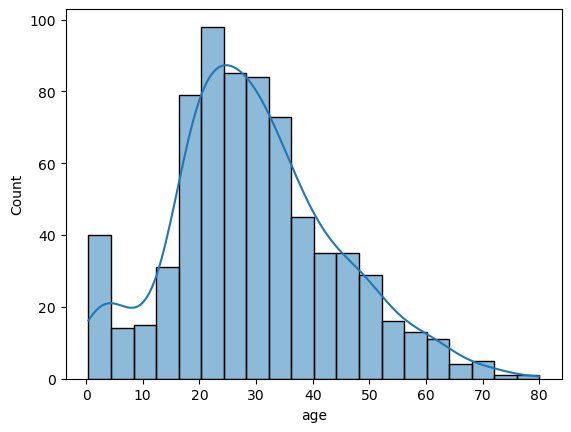

In [47]:
sns.histplot(db['age'],kde=True)

In [48]:
db['Age_mean']=db['age'].fillna(db['age'].mean())

In [49]:
db[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [55]:
# Mean Imputation works well in normally distributed data

## 2.Median imputation

In [51]:
db['age_median']=db['age'].fillna(db['age'].median())

In [53]:
db[['age','age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


### 3.Mode imputation - Categorical value

In [61]:
db[db['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [62]:
db['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
mode_val=db[db['embarked'].notna()]['embarked'][0]

In [68]:
db['embarked']=db['embarked'].fillna(mode_val)

In [69]:
db[db['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median


## 4.Random Sampling imputation

## Handling Imbalance dataset

#### 1. Up Sampling
#### 2. Down Sampling

In [72]:
import numpy as np
import pandas as pd

np.random.seed(123)

sample=1000
ratio=0.9
n1=int(sample*ratio)
n2=sample-n1

In [76]:
#CREATE DATAFRAME FOR IMBALANCED DATASET

In [82]:
c1=pd.DataFrame({
    'feature1': np.random.normal(loc=1,scale=1,size=n1),
    'feature2':np.random.normal(loc=1,scale=1,size=n1),
    'target':[0]*n1
})

c2=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n2),
    'feature2':np.random.normal(loc=2,scale=1,size=n2),
    'target':[1]*n2
})

In [84]:
df=pd.concat([c1,c2]).reset_index(drop=True)

In [85]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [86]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [88]:
from sklearn.utils import resample

In [94]:
df_min=resample(df_minority,replace=True, n_samples=len(df_majority),random_state=43)

In [95]:
df_min.shape

(900, 3)

In [99]:
db=pd.concat([df_min,c1])

In [101]:
db['target'].value_counts()

1    900
0    900
Name: target, dtype: int64

In [107]:
df_max=resample(df_majority,replace=False, n_samples=len(df_minority),random_state=42)

In [109]:
df_max.shape

(100, 3)

In [111]:
db1=pd.concat([df_max,c2])

In [112]:
db1

,feature1,feature2,target
70,-0.968149,1.323468,0
827,0.744034,-0.579172,0
231,1.025049,0.108377,0
588,3.165832,0.948849,0
39,0.139571,-0.089545,0
...,...,...,...
95,2.720690,1.978489,1
96,1.949078,3.709793,1
97,2.709784,3.324917,1
98,1.817689,1.549237,1


In [113]:
db1['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

# SMOTE - Systematic Minority Oversampling Technique

In [20]:
from sklearn.datasets import make_classification

In [56]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [57]:
import pandas as pd

In [58]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['targets'])

In [64]:
df=pd.concat([df1,df2],axis=1)

In [65]:
df

,f1,f2,targets
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [66]:
df['targets'].value_counts()

0    900
1    100
Name: targets, dtype: int64

In [67]:
import matplotlib.pyplot as pt

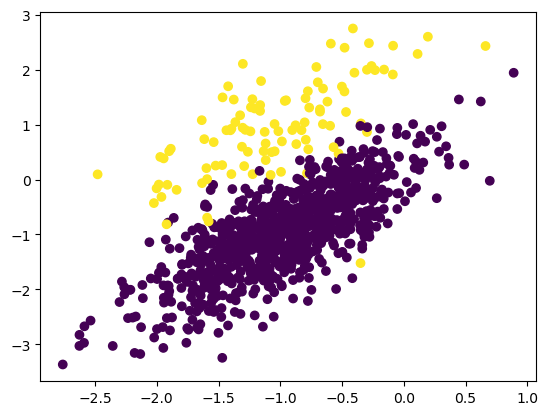

In [68]:
pt.scatter(df['f1'],df['f2'],c=df['targets'])

In [69]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.8 MB/s eta 0:00:00


In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
over_sample=SMOTE()
x,y=over_sample.fit_resample(df[['f1','f2']],df['targets'])

In [72]:
x.shape

(1800, 2)

In [75]:
len(y[y==0])

900

In [76]:
len(y[y==0])

900

In [77]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['targets'])
smote_df=pd.concat([df1,df2],axis=1)

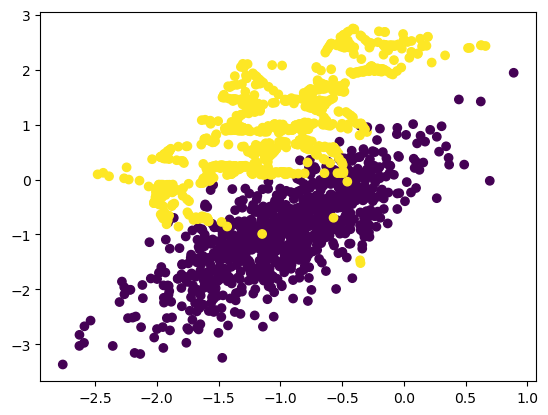

In [78]:
pt.scatter(smote_df['f1'],smote_df['f2'],c=smote_df['targets'])

# DATA INTERPOLATION

## 1.Linear Interpolation

In [80]:
import numpy as np

In [81]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

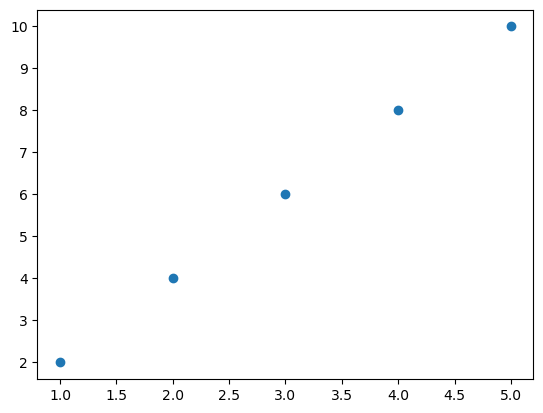

In [82]:
pt.scatter(x,y)

In [84]:
x_new = np.linspace(1,5,10)
y_int= np.interp(x_new,x,y)

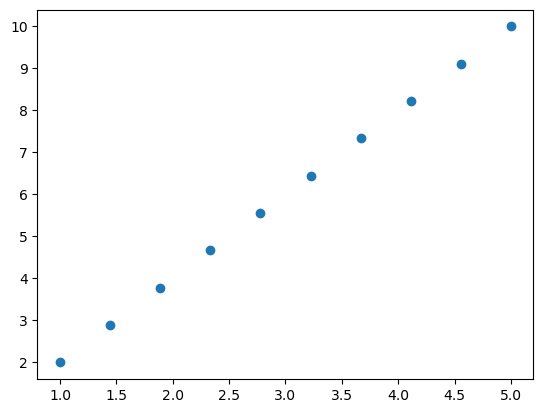

In [85]:
pt.scatter(x_new,y_int)

## 2.Cubic Interpolation

In [88]:
from scipy.interpolate import interp1d
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

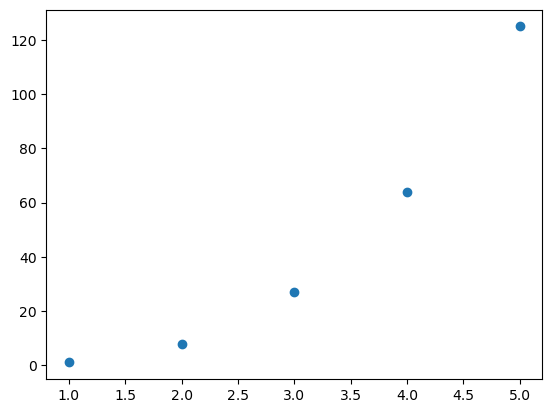

In [91]:
pt.scatter(x,y)

In [89]:
f=interp1d(x,y,kind='cubic')

In [90]:
x_new=np.linspace(1,5,10)

In [92]:
y_int=f(x_new)

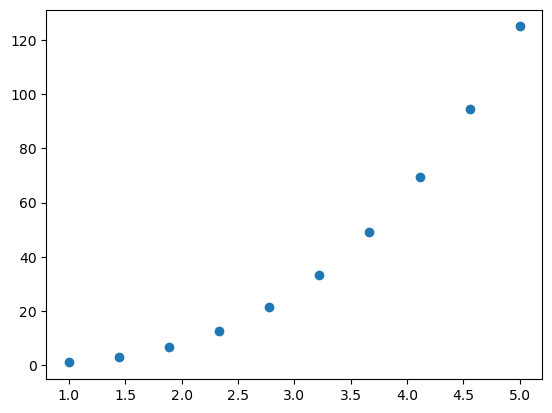

In [94]:
pt.scatter(x_new,y_int)

## 3.Polynomial Interpolation

In [96]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [98]:
p=np.polyfit(x,y,3)

In [99]:
x_new=np.linspace(1,5,10)

In [100]:
y_int=np.polyval(p,x_new)

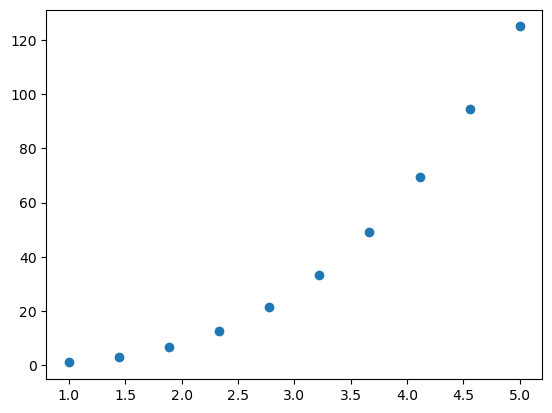

In [101]:
pt.scatter(x_new,y_int)

# 5 Number Summary and box plot

In [23]:
import numpy as np
a=[-100,1,2,3,4,1,2,4,56,6,74,56,43,32,1,23,34,2,64,21,100,120,200]
minimum,q1,median,q3,maximum=np.quantile(a,[0,0.25,0.50,0.75,1.00])

In [24]:
iqr=q3-q1

In [25]:
lower=q1-1.5*iqr
high=q3+1.5*iqr

In [26]:
high

137.0

In [27]:
import seaborn as sns

<AxesSubplot: >

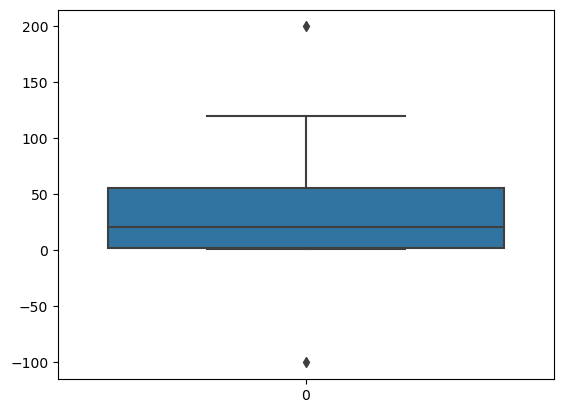

In [28]:
sns.boxplot(a)